# Crime data from 2017

http://www.houstontx.gov/police/cs/crime-stats-archives.htm

In [1]:
import pandas as pd
import glob, os
import numpy as np
import matplotlib.pyplot as plt
import datetime  as dt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
ls data/2017

apr17.xls*  dec17.xls*  jan17.xls*  jun17.xls*  may17.xls*  oct17.xls*
aug17.xls*  feb17.xls*  jul17.xls*  mar17.xls*  nov17.xls*  sep17.xls*


In [3]:
path = 'data/2017'

In [4]:
# combine all files into one df
all_files = glob.glob(os.path.join(path, "*.xls")) 
df_from_each_file = (pd.read_excel(f) for f in all_files)
df   = pd.concat(df_from_each_file, ignore_index=True)

WARNING *** file size (3078551) not 512 + multiple of sector size (512)
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero


In [5]:
df.head()

,# offenses,Beat,Block Range,BlockRange,Date,Hour,Offense Type,Offenses,Premise,Street Name,StreetName,Suffix,Type
0,1.0,10H10,NaN,200-299,2017-04-10 00:00:00,15,Burglary,NaN,Residence or House,NaN,CLIFTON,-,-
1,1.0,10H10,NaN,2300-2399,2017-04-11 00:00:00,15,Theft,NaN,Restaurant or Cafeteria Parking Lot,NaN,CANAL,-,ST
2,1.0,10H10,NaN,2300-2399,2017-04-11 00:00:00,17,Theft,NaN,Restaurant or Cafeteria Parking Lot,NaN,CANAL,-,ST
3,1.0,10H10,NaN,4600-4699,2017-04-12 00:00:00,9,Burglary,NaN,Miscellaneous Business (Non-Specific),NaN,CANAL,-,ST
4,1.0,10H10,NaN,100-199,2017-04-12 00:00:00,19,Theft,NaN,"Other, Unknown, or Not Listed",NaN,ADAM,-,LN


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119727 entries, 0 to 119726
Data columns (total 13 columns):
# offenses      40378 non-null float64
Beat            119727 non-null object
Block Range     79349 non-null object
BlockRange      40378 non-null object
Date            119727 non-null object
Hour            119727 non-null int64
Offense Type    119727 non-null object
Offenses        79349 non-null float64
Premise         119240 non-null object
Street Name     79349 non-null object
StreetName      40378 non-null object
Suffix          119727 non-null object
Type            119727 non-null object
dtypes: float64(2), int64(1), object(10)
memory usage: 11.9+ MB


## Check for missing values

In [7]:
df.apply(lambda x: sum(x.isnull()))

# offenses      79349
Beat                0
Block Range     40378
BlockRange      79349
Date                0
Hour                0
Offense Type        0
Offenses        40378
Premise           487
Street Name     40378
StreetName      79349
Suffix              0
Type                0
dtype: int64

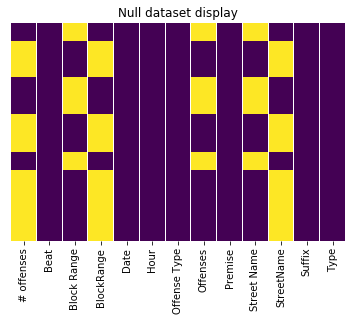

In [8]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.title('Null dataset display')
plt.show()

## Cleanup

- joining similar columns
- renaming

In [9]:
df.head()

,# offenses,Beat,Block Range,BlockRange,Date,Hour,Offense Type,Offenses,Premise,Street Name,StreetName,Suffix,Type
0,1.0,10H10,NaN,200-299,2017-04-10 00:00:00,15,Burglary,NaN,Residence or House,NaN,CLIFTON,-,-
1,1.0,10H10,NaN,2300-2399,2017-04-11 00:00:00,15,Theft,NaN,Restaurant or Cafeteria Parking Lot,NaN,CANAL,-,ST
2,1.0,10H10,NaN,2300-2399,2017-04-11 00:00:00,17,Theft,NaN,Restaurant or Cafeteria Parking Lot,NaN,CANAL,-,ST
3,1.0,10H10,NaN,4600-4699,2017-04-12 00:00:00,9,Burglary,NaN,Miscellaneous Business (Non-Specific),NaN,CANAL,-,ST
4,1.0,10H10,NaN,100-199,2017-04-12 00:00:00,19,Theft,NaN,"Other, Unknown, or Not Listed",NaN,ADAM,-,LN


In [10]:
# if duplicate columns

df['BlockRange'] = pd.concat([df['Block Range'].dropna(),
                              df['BlockRange'].dropna()]).reindex_like(df)

df['StreetName'] = pd.concat([df['Street Name'].dropna(),
                              df['StreetName'].dropna()]).reindex_like(df)

df['# offenses'] = pd.concat([df['# offenses'].dropna(),
                              df['Offenses'].dropna()]).reindex_like(df)

In [11]:
df.head()

,# offenses,Beat,Block Range,BlockRange,Date,Hour,Offense Type,Offenses,Premise,Street Name,StreetName,Suffix,Type
0,1.0,10H10,NaN,200-299,2017-04-10 00:00:00,15,Burglary,NaN,Residence or House,NaN,CLIFTON,-,-
1,1.0,10H10,NaN,2300-2399,2017-04-11 00:00:00,15,Theft,NaN,Restaurant or Cafeteria Parking Lot,NaN,CANAL,-,ST
2,1.0,10H10,NaN,2300-2399,2017-04-11 00:00:00,17,Theft,NaN,Restaurant or Cafeteria Parking Lot,NaN,CANAL,-,ST
3,1.0,10H10,NaN,4600-4699,2017-04-12 00:00:00,9,Burglary,NaN,Miscellaneous Business (Non-Specific),NaN,CANAL,-,ST
4,1.0,10H10,NaN,100-199,2017-04-12 00:00:00,19,Theft,NaN,"Other, Unknown, or Not Listed",NaN,ADAM,-,LN


In [12]:
df.rename(columns={
    '# offenses': 'NumOffenses',
     'Offense Type': 'OffenseType',
}, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119727 entries, 0 to 119726
Data columns (total 13 columns):
NumOffenses    119727 non-null float64
Beat           119727 non-null object
Block Range    79349 non-null object
BlockRange     119727 non-null object
Date           119727 non-null object
Hour           119727 non-null int64
OffenseType    119727 non-null object
Offenses       79349 non-null float64
Premise        119240 non-null object
Street Name    79349 non-null object
StreetName     119727 non-null object
Suffix         119727 non-null object
Type           119727 non-null object
dtypes: float64(2), int64(1), object(10)
memory usage: 11.9+ MB


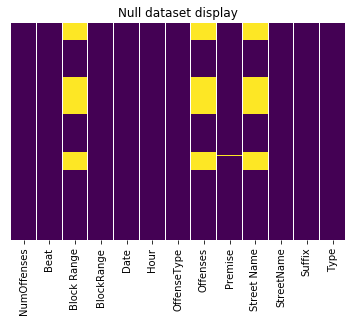

In [13]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.title('Null dataset display')
plt.show()

In [14]:
df.apply(lambda x: sum(x.isnull()))

NumOffenses        0
Beat               0
Block Range    40378
BlockRange         0
Date               0
Hour               0
OffenseType        0
Offenses       40378
Premise          487
Street Name    40378
StreetName         0
Suffix             0
Type               0
dtype: int64

## Subset dataframe to work on 

In [15]:
crimes = df[['Date','Beat','BlockRange','StreetName','OffenseType','Premise','NumOffenses','Hour']]
crimes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119727 entries, 0 to 119726
Data columns (total 8 columns):
Date           119727 non-null object
Beat           119727 non-null object
BlockRange     119727 non-null object
StreetName     119727 non-null object
OffenseType    119727 non-null object
Premise        119240 non-null object
NumOffenses    119727 non-null float64
Hour           119727 non-null int64
dtypes: float64(1), int64(1), object(6)
memory usage: 7.3+ MB


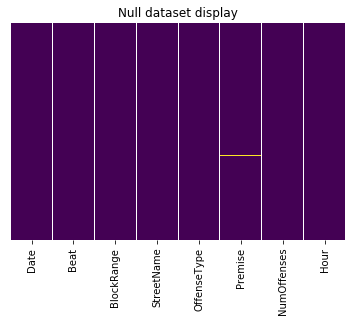

In [16]:
sns.heatmap(crimes.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.title('Null dataset display')
plt.show()

# FIND NAN

## Find NaN
- drop if > 2 nan

In [17]:
crimes.apply(lambda x: sum(x.isnull()))

Date             0
Beat             0
BlockRange       0
StreetName       0
OffenseType      0
Premise        487
NumOffenses      0
Hour             0
dtype: int64

In [18]:
crimes[crimes.isnull().any(axis=1)].head()

,Date,Beat,BlockRange,StreetName,OffenseType,Premise,NumOffenses,Hour
30,2017-04-29 00:00:00,10H10,4700-4799,HARRISBURG,Burglary,NaN,1.0,21
132,2017-04-16 00:00:00,10H40,2700-2799,TRAVIS,Burglary,NaN,1.0,7
185,2017-04-06 00:00:00,10H40,1500-1599,HADLEY,Theft,NaN,1.0,22
259,2017-04-18 00:00:00,10H50,3900-3999,DENNIS,Theft,NaN,1.0,1
391,2017-04-04 00:00:00,10H60,2800-2899,SOUTHMORE,Aggravated Assault,NaN,1.0,22


## Problem
- find nan values and fix

In [19]:
null_premise = crimes.Premise.isnull()

In [20]:
crimes['Premise'] = crimes["Premise"].fillna('none')

In [21]:
crimes.apply(lambda x: sum(x.isnull()))

Date           0
Beat           0
BlockRange     0
StreetName     0
OffenseType    0
Premise        0
NumOffenses    0
Hour           0
dtype: int64

## Inspect each column

In [22]:
crimes.dtypes

Date            object
Beat            object
BlockRange      object
StreetName      object
OffenseType     object
Premise         object
NumOffenses    float64
Hour             int64
dtype: object

## Beat column
- total beats should be around 120

In [23]:
len(crimes.Beat.value_counts())

237

In [24]:
len(crimes.Beat.value_counts(dropna=False))

237

In [25]:
crimes.Beat.unique()[:10]

array(['10H10', '10H20', '10H30', '10H40', '10H50', '10H60', '10H70',
       '10H80', '11H10', '11H20'], dtype=object)

In [26]:
# replace extra ' with empty space
crimes['Beat'] = crimes.Beat.str.replace("'", " ")

In [27]:
len(crimes.Beat.value_counts(dropna=False))

237

In [28]:
# strip empty spaces
crimes.Beat = crimes.Beat.str.strip()

In [29]:
len(crimes.Beat.value_counts(dropna=False))  # get the total

120

In [30]:
crimes.Beat.unique()

array(['10H10', '10H20', '10H30', '10H40', '10H50', '10H60', '10H70',
       '10H80', '11H10', '11H20', '11H30', '11H40', '11H50', '12D10',
       '12D20', '12D30', '12D40', '12D50', '12D60', '12D70', '13D10',
       '13D20', '13D30', '13D40', '14D10', '14D20', '14D30', '14D40',
       '14D50', '15E10', '15E20', '15E30', '15E40', '16E10', '16E20',
       '16E30', '16E40', '17E10', '17E20', '17E30', '17E40', '18F10',
       '18F20', '18F30', '18F40', '18F50', '18F60', '19G10', '19G20',
       '19G30', '19G40', '19G50', '1A10', '1A20', '1A30', '1A40', '1A50',
       '20G10', '20G20', '20G30', '20G40', '20G50', '20G60', '20G70',
       '20G80', '21I10', '21I20', '21I30', '21I40', '21I50', '21I60',
       '21I70', '23J50', '24C10', '24C20', '24C30', '24C40', '24C50',
       '24C60', '2A10', '2A20', '2A30', '2A40', '2A50', '2A60', '3B10',
       '3B30', '3B40', '3B50', '4F10', '4F20', '4F30', '5F10', '5F20',
       '5F30', '5F40', '6B10', '6B20', '6B30', '6B40', '6B50', '6B60',
       '7C10

In [31]:
crimes.Beat.value_counts(dropna=False).head()

1A20     2852
15E40    2443
12D10    2430
19G10    2205
18F20    2202
Name: Beat, dtype: int64

## BlockRange

In [32]:
len(crimes.BlockRange.value_counts(dropna=False))

320

In [33]:
crimes.BlockRange.value_counts(dropna=False).head()

900-999      1652
UNK          1629
100-199      1605
2400-2499    1553
2300-2399    1472
Name: BlockRange, dtype: int64

In [34]:
# strip
crimes.BlockRange =crimes.BlockRange.str.strip()

In [35]:
len(crimes.BlockRange.value_counts(dropna=False))

320

## StreetName

In [36]:
print('before:{}'.format(len(crimes.StreetName.value_counts(dropna=False))))

before:21587


In [37]:
# remove extra spaces
crimes.StreetName = crimes.StreetName.str.strip()


# make all lower case
crimes.StreetName = crimes.StreetName.str.lower()

In [38]:
print('after:{}'.format(len(crimes.StreetName.value_counts(dropna=False))))

after:18672


In [39]:
print(crimes.StreetName.value_counts(dropna=False).head())

westheimer       2101
westheimer rd    1438
gessner          1028
north             882
loop              833
Name: StreetName, dtype: int64


## OffenseType
Total 8
- Theft
- Burlary
- Aggravated Assalult
- Robbery
- Auto Theft
- Rape
- Murder


In [40]:
print('before:{}'.format(len(crimes.OffenseType.value_counts(dropna=False))))

before:16


In [41]:
crimes.OffenseType = crimes.OffenseType.str.strip()

In [42]:
print('after:{}'.format(len(crimes.OffenseType.value_counts(dropna=False))))

after:9


In [43]:
print(crimes.OffenseType.value_counts(dropna=False))

Theft                 67422
Burglary              17084
Aggravated Assault    12314
Robbery                9778
AutoTheft              7627
Auto Theft             3874
Rape                   1368
Murder                  258
NaN                       2
Name: OffenseType, dtype: int64


In [44]:
# join Auto Theft & AutoTheft
crimes.OffenseType = crimes.OffenseType.replace('AutoTheft','Auto Theft')

#### fill nans with most common value

In [45]:
crimes = crimes.fillna(crimes['OffenseType'].value_counts().index[0])

In [46]:
print(crimes.OffenseType.value_counts(dropna=False))

Theft                 67424
Burglary              17084
Aggravated Assault    12314
Auto Theft            11501
Robbery                9778
Rape                   1368
Murder                  258
Name: OffenseType, dtype: int64


## Premise

In [47]:
print('before:{}'.format(len(crimes.Premise.value_counts(dropna=False))))

before:253


In [48]:
crimes.Premise = crimes.Premise.str.strip()
crimes.Premise = crimes.Premise.str.lower()

In [49]:
print('after:{}'.format(len(crimes.Premise.value_counts(dropna=False))))

after:133


In [50]:
crimes.Premise.value_counts(dropna=False).head()

residence or house           15197
apartment parking lot        14009
road, street, or sidewalk    12409
apartment                    11302
other parking lot             5419
Name: Premise, dtype: int64

# Date column

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119727 entries, 0 to 119726
Data columns (total 13 columns):
NumOffenses    119727 non-null float64
Beat           119727 non-null object
Block Range    79349 non-null object
BlockRange     119727 non-null object
Date           119727 non-null object
Hour           119727 non-null int64
OffenseType    119727 non-null object
Offenses       79349 non-null float64
Premise        119240 non-null object
Street Name    79349 non-null object
StreetName     119727 non-null object
Suffix         119727 non-null object
Type           119727 non-null object
dtypes: float64(2), int64(1), object(10)
memory usage: 11.9+ MB


## Date
- make datetime index

In [52]:
# date
crimes.Date = pd.to_datetime(crimes.Date)

crimes = crimes.set_index('Date').sort_index(ascending=True)

In [53]:
crimes.head()

,Beat,BlockRange,StreetName,OffenseType,Premise,NumOffenses,Hour
Date,,,,,,,
1917-01-20,20G20,2100-2199,gessner,Theft,apartment parking lot,1.0,12
1917-02-20,17E20,9100-9199,fondren,Auto Theft,"road, street, or sidewalk",1.0,15
1917-02-20,10H70,7500-7599,ardmore,Theft,other parking lot,1.0,16
1917-04-16,18F20,1100-1199,uptown park,Rape,bar or night club,1.0,12
1917-12-18,9C20,500-599,portwall,Theft,miscellaneous business (non-specific),1.0,14


## Create Columns with day,weekday,month,year from datetime index

It allows us to view incorect reports by date better

In [54]:
# get day, weekday,month ,year

crimes['day'] = crimes.index.strftime('%d')
crimes['weekday'] = crimes.index.strftime('%A')
crimes['month'] = crimes.index.strftime('%b')
crimes['year'] = crimes.index.strftime('%Y')

In [55]:
crimes.head()

,Beat,BlockRange,StreetName,OffenseType,Premise,NumOffenses,Hour,day,weekday,month,year
Date,,,,,,,,,,,
1917-01-20,20G20,2100-2199,gessner,Theft,apartment parking lot,1.0,12,20,Saturday,Jan,1917
1917-02-20,17E20,9100-9199,fondren,Auto Theft,"road, street, or sidewalk",1.0,15,20,Tuesday,Feb,1917
1917-02-20,10H70,7500-7599,ardmore,Theft,other parking lot,1.0,16,20,Tuesday,Feb,1917
1917-04-16,18F20,1100-1199,uptown park,Rape,bar or night club,1.0,12,16,Monday,Apr,1917
1917-12-18,9C20,500-599,portwall,Theft,miscellaneous business (non-specific),1.0,14,18,Tuesday,Dec,1917


In [56]:
crimes.year.value_counts(dropna=False)

2017    118581
2016      1002
2015        51
2014        31
2013        10
2010         8
2007         7
2011         5
1917         5
2009         3
2012         3
2006         2
1993         2
2008         2
2002         2
2005         2
1920         2
1983         2
1964         1
2001         1
1953         1
2000         1
1990         1
1976         1
1927         1
Name: year, dtype: int64

We can see now that many reports have incorect year

In [57]:
yr = crimes.year == '2017'
crimes[~yr].year.value_counts()

2016    1002
2015      51
2014      31
2013      10
2010       8
2007       7
1917       5
2011       5
2009       3
2012       3
2008       2
2005       2
2002       2
1920       2
2006       2
1993       2
1983       2
2001       1
2000       1
1964       1
1927       1
1953       1
1976       1
1990       1
Name: year, dtype: int64

## null values

- check
- count
- display

In [58]:
crimes.apply(lambda x: sum(x.isnull()))

Beat           0
BlockRange     0
StreetName     0
OffenseType    0
Premise        0
NumOffenses    0
Hour           0
day            0
weekday        0
month          0
year           0
dtype: int64

In [59]:
# display any null
len(crimes[crimes.isnull().any(axis=1)])

0

In [60]:
crimes[crimes.isnull().any(axis=1)].head()

,Beat,BlockRange,StreetName,OffenseType,Premise,NumOffenses,Hour,day,weekday,month,year
Date,,,,,,,,,,,


In [61]:
crimes = crimes.dropna(subset=['BlockRange', 'StreetName'])

In [62]:
crimes.apply(lambda x: sum(x.isnull()))

Beat           0
BlockRange     0
StreetName     0
OffenseType    0
Premise        0
NumOffenses    0
Hour           0
day            0
weekday        0
month          0
year           0
dtype: int64

## New Dataframe
- remove premise col
- keep premise description

In [63]:
crime_yr = crimes[['Beat','BlockRange','StreetName','OffenseType','Premise','NumOffenses','Hour','day','weekday','month','year']]
crime_yr.head()

,Beat,BlockRange,StreetName,OffenseType,Premise,NumOffenses,Hour,day,weekday,month,year
Date,,,,,,,,,,,
1917-01-20,20G20,2100-2199,gessner,Theft,apartment parking lot,1.0,12,20,Saturday,Jan,1917
1917-02-20,17E20,9100-9199,fondren,Auto Theft,"road, street, or sidewalk",1.0,15,20,Tuesday,Feb,1917
1917-02-20,10H70,7500-7599,ardmore,Theft,other parking lot,1.0,16,20,Tuesday,Feb,1917
1917-04-16,18F20,1100-1199,uptown park,Rape,bar or night club,1.0,12,16,Monday,Apr,1917
1917-12-18,9C20,500-599,portwall,Theft,miscellaneous business (non-specific),1.0,14,18,Tuesday,Dec,1917


In [64]:
crime_yr.isnull().values.any().any()

False

In [65]:
# display any null

len(crime_yr[crime_yr.isnull().any(axis=1)])

0

In [66]:
crime_yr[crime_yr.isnull().any(axis=1)].tail()

,Beat,BlockRange,StreetName,OffenseType,Premise,NumOffenses,Hour,day,weekday,month,year
Date,,,,,,,,,,,


## Save

In [67]:
crime_yr.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 119727 entries, 1917-01-20 to 2017-12-31
Data columns (total 11 columns):
Beat           119727 non-null object
BlockRange     119727 non-null object
StreetName     119727 non-null object
OffenseType    119727 non-null object
Premise        119727 non-null object
NumOffenses    119727 non-null float64
Hour           119727 non-null int64
day            119727 non-null object
weekday        119727 non-null object
month          119727 non-null object
year           119727 non-null object
dtypes: float64(1), int64(1), object(9)
memory usage: 11.0+ MB


In [68]:
crime_yr.to_csv('data/clean/crime17_clean.csv')

In [69]:
ls crime_data_clean/new

ls: cannot access 'crime_data_clean/new': No such file or directory


In [70]:
ls data/clean

crime10_clean.csv*  crime12_clean.csv*  crime14_clean.csv*  crime16_clean.csv*
crime11_clean.csv*  crime13_clean.csv*  crime15_clean.csv*  crime17_clean.csv*
